## Model simulation: Force balance of an harmonic oscillator

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

with $x_1=x, x_2=\frac{dx}{dt}$

In [1]:
# Importing python libraries
import sys
import os
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Label

%load_ext autoreload
%autoreload 1

# We import all of our functions prepared in advanced
sys.path.append("../functions")
%aimport general_functions
%aimport force
function_derivatives = force.model_derivatives

#Check Python version
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


## Model simulation

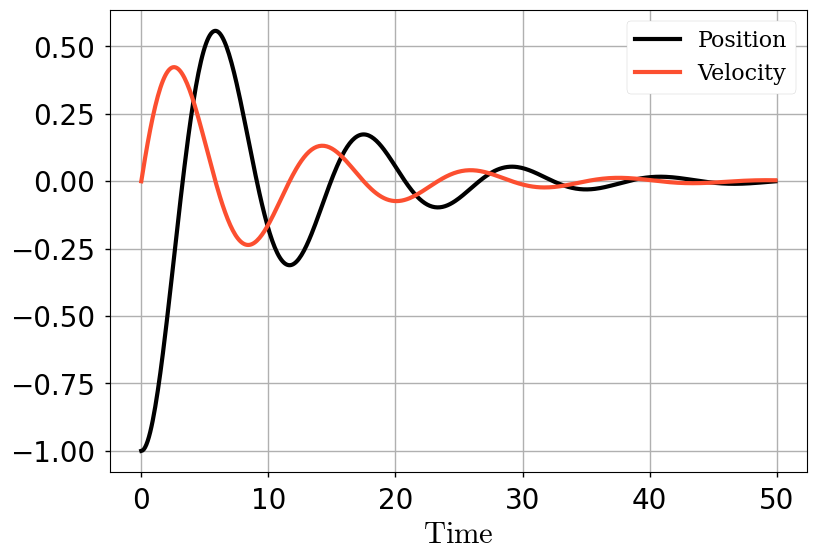

In [2]:
pos_init = -1
vel_init = 0

df = general_functions.model(
    np.arange(0, 50, 0.1),   # Time steps
    [pos_init, vel_init],    # Initial conditions
    ['Position','Velocity'], # Variable names
    function_derivatives,    # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    b=0.2, m=1, k=0.3, Fex=0.)

plt.show()

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

## Impact of initial conditions and inputs

In [3]:
def interactive_model(x1, x2):
    general_functions.model(
        np.arange(0, 50, 0.1), # Timesteps
        [x1, x2],              # Initial conditions
        ['x1','x2'],           # Variable names
        function_derivatives,  # Function derivatives
        returnDataFrame=False, plotresults=True,
        # Specify parameter values
        b=0.2, m=1, k=0.3, Fex=0.)
interact(interactive_model,
         x1=FloatSlider(value=-1, min=-10, max=10, step=1, description='x1', continuous_update=False),
         x2=FloatSlider(value=0, min=-10, max=10, step=1, description='x2', continuous_update=False));

interactive(children=(FloatSlider(value=-1.0, continuous_update=False, description='x1', max=10.0, min=-10.0, …

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

## Impact of model parameters

In [4]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 50, 0.1)),
         init=fixed([-1, 0]), varnames=fixed([r'$x_1$',r'$x_2$']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         b=FloatSlider(value=0.2, min=0., max=0.5, step=0.01, name='b', continuous_update=False),
         m=FloatSlider(value=1, min=0., max=5., step=0.1, name='m', continuous_update=False),
         k=FloatSlider(value=0.3, min=0., max=2., step=0.1, name='k', continuous_update=False),
         Fex=FloatSlider(value=0, min=0., max=2., step=0.1, name='Fex', continuous_update=False));
         #Fex=fixed(0));

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='b', max=0.5, step=0.01), Fl…

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

# Sensitivity Analysis

In [5]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 50, 0.1)), # Timesteps
    init = fixed([-1, 0]), # Initial conditions
    varnames = fixed(['x1','x2']), # Variable names
    f = fixed(function_derivatives), # Function derivatives
    parametername=ToggleButtons(options=['b', 'm', 'k', 'Fex']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    b=fixed(0.2), m=fixed(1), k=fixed(0.3), Fex=fixed(0.));

interactive(children=(ToggleButtons(description='parametername', options=('b', 'm', 'k', 'Fex'), value='b'), I…